## House Prices: Advanced Regression Techniques : Kaggle Competition

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

### Step1: Check for missing values

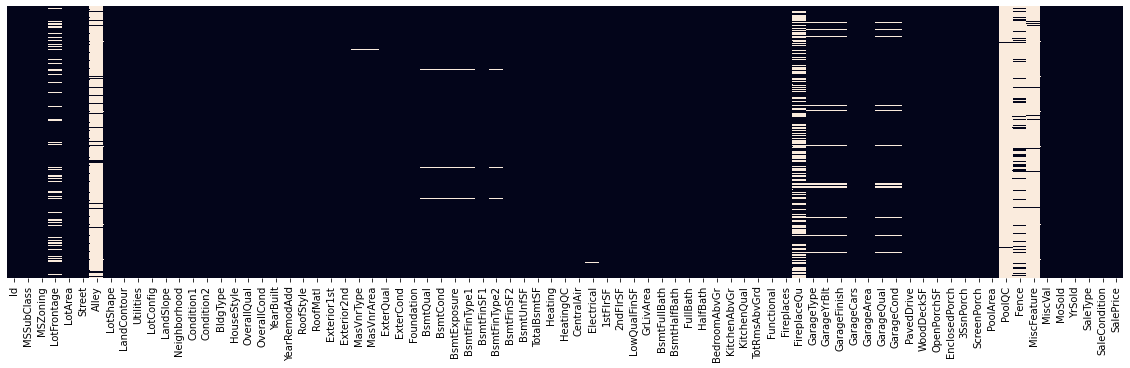

In [5]:
fig, ax = plt.subplots(figsize=(20,5))         # To change fig shape for better representation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, ax=ax)

In [6]:
def missing_zero_values_table(dataframe):
        zero_val = (dataframe == 0.00).astype(int).sum(axis=0)
        mis_val = dataframe.isnull().sum()
        mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        zero_val = (dataframe == 0.00).astype(int).sum(axis=0)
        mis_val = dataframe.isnull().sum()
        mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Data Type'] = dataframe.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(dataframe.shape[1]) + " columns and " + str(dataframe.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [7]:
missing_zero_values_table(df)

Your selected dataframe has 81 columns and 1460 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
PoolQC,0,1453,99.5,object
MiscFeature,0,1406,96.3,object
Alley,0,1369,93.8,object
Fence,0,1179,80.8,object
FireplaceQu,0,690,47.3,object
LotFrontage,0,259,17.7,float64
GarageType,0,81,5.5,object
GarageYrBlt,0,81,5.5,float64
GarageFinish,0,81,5.5,object
GarageQual,0,81,5.5,object


### Step 2: Filling Missing values and droping columns whose missing >70%

In [8]:
# droping columns whose missing >70%
df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

#### Handling Missing data : categorical data with MODE & numerical data with MEAN

In [9]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [10]:
df['FireplaceQu'].fillna(value='Gd', inplace=True) 

In [11]:
df['LotFrontage'].mean()

70.04995836802665

In [12]:
df['LotFrontage'].fillna(value=70.05, inplace=True)

In [13]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [14]:
df['GarageType'].fillna(value='Attchd', inplace=True) 

In [15]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [16]:
df['GarageYrBlt'].fillna(value=2005, inplace=True) 

In [17]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [18]:
df['GarageFinish'].fillna(value='Unf', inplace=True) 

In [19]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [20]:
df['GarageQual'].fillna(value='TA', inplace=True) 

In [21]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [22]:
df['GarageCond'].fillna(value='TA', inplace=True) 

In [23]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [24]:
df['BsmtExposure'].fillna(value='No', inplace=True)

In [25]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [26]:
df['BsmtFinType1'].fillna(value='Unf', inplace=True)

In [27]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [28]:
df['BsmtFinType2'].fillna(value='Unf', inplace=True)

In [29]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [30]:
df['BsmtCond'].fillna(value='TA', inplace=True)

In [31]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [32]:
df['BsmtQual'].fillna(value='TA', inplace=True)

In [33]:
df['MasVnrArea'].mean()

103.68526170798899

In [34]:
df['MasVnrArea'].fillna(value=103.6, inplace=True)

In [35]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [36]:
df['MasVnrType'].fillna(value='None', inplace=True)

In [37]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
df['Electrical'].fillna(value='SBrkr', inplace=True)

In [39]:
df.shape

(1460, 77)

In [40]:
#df.drop(['Id'],axis=1,inplace=True)

In [41]:
missing_zero_values_table(df)

Your selected dataframe has 77 columns and 1460 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type


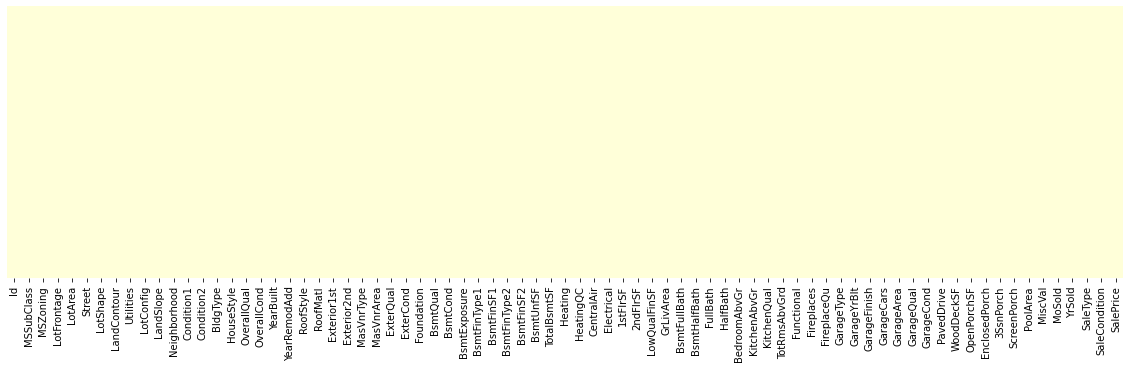

In [42]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu',ax=ax)

In [43]:
df.dropna(inplace=True)

In [44]:
df.shape

(1460, 77)

In [45]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Data Engineering is done !!

### Now we will handle Categorical  Data ( to Numerical Data)

In [46]:
##HAndle Categorical Features
columns = list(df.select_dtypes(include=['object']).columns)
columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [47]:
len(columns)

39

In [48]:
main_df=df.copy() # saving original data copy

In [49]:
## Test Data 
test_df=pd.read_csv('cleaned_test.csv')

In [50]:
test_df.shape

(1459, 76)

In [51]:
df.shape

(1460, 77)

#### Read!
Train Data has 77 features and Test Data has 76 features.
That extra column(feature) is SalePrice which will be seperated later before fitting in model

Now we will combine both the test and train data and apply get_dummies to categorical data which will convert categorical variable into dummy/indicator variables.
We have combined them both together so that while conversion identity remains same. 

In [52]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [53]:
final_df=pd.concat([df,test_df],axis=0)

In [54]:
final_df['SalePrice'] #SalePrice of test data will get Nan values which needs to be predicted

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [55]:
final_df.shape

(2919, 77)

In [56]:
# function to apply get_dummies to all categorical data which will convert categorical variable into 
# dummy/indicator variables 
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [57]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [58]:
final_df.shape

(2919, 238)

In [59]:
# removing duplicate columns as they wont help
final_df =final_df.loc[:,~final_df.columns.duplicated()] 

In [60]:
final_df.shape

(2919, 178)

In [61]:
final_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0


In [124]:
final_df.drop(['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold'],axis=1,inplace=True)

In [125]:
final_df['SalePrice'] 

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

### Final dataset of train+test
Now we will seperate test and train 
In train we will further seperate features mapping to price
####   X------------->Y
(fetures).  . . .  (price)

In [126]:
df_Train=final_df.iloc[:1460,:] # 1460 is clculted from previous train data size
df_Test=final_df.iloc[1460:,:]

In [127]:
df_Train.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,65.0,8450,7,2003,2003,196.0,706.0,150.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,1976,1976,0.0,978.0,284.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,2001,2002,162.0,486.0,434.0,920.0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,1915,1970,0.0,216.0,540.0,756.0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,2000,2000,350.0,655.0,490.0,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [128]:
df_Test.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1461,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,78.0,9978,6,1998,1998,20.0,602.0,324.0,926.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,43.0,5005,8,1992,1992,0.0,263.0,1017.0,1280.0,...,0,0,0,0,1,0,0,0,1,0


In [129]:
df_Train.shape

(1460, 164)

In [130]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Remove ID and seperate out salesPrice as they are not fetures just label and output

In [131]:
X_train_model=df_Train.drop(['SalePrice','Id'],axis=1)
y_train_model=df_Train['SalePrice']


In [132]:
X_test_model=df_Test.drop(['Id'],axis=1)

In [171]:
print(X_train_model.shape)
print(X_test_model.shape)

(1460, 162)
(1459, 162)


In [199]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_train_model, y_train_model, test_size=0.1) 
# 70% training and 30% test

## Random Forest

In [200]:
from sklearn.ensemble import RandomForestRegressor

lr = RandomForestRegressor(n_estimators=100)
lr.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.98
Test set score: 0.91


In [201]:
y_pred = lr.predict(X_test_model)
y_pred

array([128400.58, 154479.5 , 184864.27, ..., 155631.25, 111926.5 ,
       229852.41])

In [202]:
#Create Sample Submission file and Submit
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('trial_rf_all_non_imp_rem.csv',index=False)

In [81]:
#sub_df.shape

In [82]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.svm import SVC
# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X_train_model, y_train_model, test_size=0.3, random_state=0)
# # Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [1e-2,1e-3, 1e-4,1],'C': [0.1,0.01,1,5],'degree':[2,3]}]
                     
# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print('')

#     clf = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
#     clf.fit(X_train, y_train)

#     print("Best parameters set found on development set:")
#     print('')
#     print(clf.best_params_)
#     print('')
#     print("Grid scores on development set:")
#     print('')
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
#     print('')
#     print("Detailed classification report:")
#     print('')
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print('')
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print('')